In [24]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import batch_iter, load
from model import *

base = Path('../aclImdb')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
train_df = pd.read_csv('train.csv')
train_df = train_df[train_df.file_length > 200]

lang = load_model()

In [27]:
# Sample Example from dataset
for sents, targets in batch_iter(lang, train_df, 3, shuffle=True):
    x = sents
    break

In [29]:
model_path = 'e=5_itr=3_cancel_model.bin'
model, optim, lang = load('model_saves/' + model_path)

In [30]:
# Hook the Attention Weights
attentions = model._modules.get('attentions')
tracked_attention_weigths = []
def show(m, i, o): 
    _, w = o
    tracked_attention_weigths.append(w)
hook = attentions[0].register_forward_hook(show)

In [31]:
h_x = model(x)
hook.remove()

In [32]:
w = tracked_attention_weigths[0]
w.detach().numpy().squeeze().shape

(3, 217, 217)

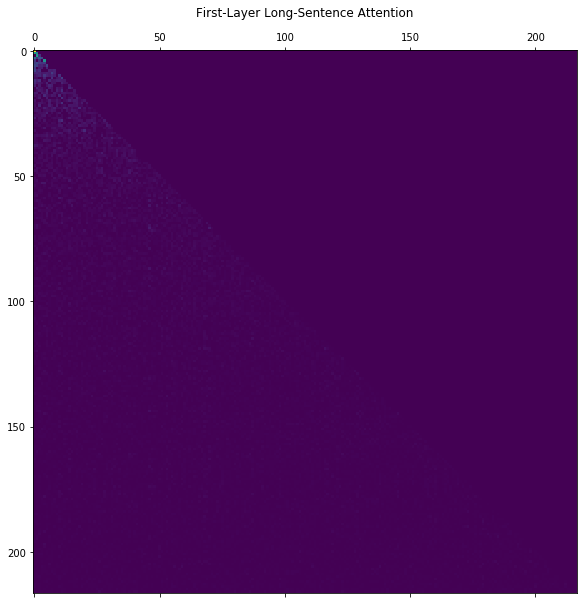

i come to pinjar from a completely different background than most of the other reviewers who have posted here . i am relatively new to bollywood films and was born and raised in the us . so i do not have a broad basis for comparing pinjar to other indian films . luckily no comparison is needed . pinjar stands on its own as nothing less than a masterpiece . in one line i can tell you that pinjar is one of the most important films to come out of any studio anywhere at any time . on a mass appeal scale it could have been the indian equivalent of crouching tiger hidden dragon had it been adequately promoted in the us . this could very well have been the film that put bollywood on the american map . the american movie going public has a long standing love affair with gone with the wind and while pinjar does not borrow from that plot there are some passing similarities . not the least of which is the whopping by us standards minute run time . set against the gritty backdrop of the india paki

In [33]:
# Thanks to, 
# https://www.tensorflow.org/alpha/tutorials/text/nmt_with_attention
batch_index = 2
sentence = x[batch_index]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
attention = w.detach().numpy().squeeze()
attention = attention[batch_index] if type(batch_index) == int else attention
ax.matshow(attention, cmap='viridis')
fontdict = {'fontsize': 14}

# ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
# ax.set_yticklabels([''] + sentence, fontdict=fontdict)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_title("First-Layer Long-Sentence Attention")

plt.show()
print(' '.join(x[0]))